# Diabetes Prediction with Glucose Concentration

Import the glucose dataset from .csv file:

In [1]:
import pandas as pd

df = pd.read_csv('./dataset.csv')

X = df[['glucose']]  
y = df['outcome']    

Separate dataset into training (80%) and test (20%) data:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Plot data distribution:

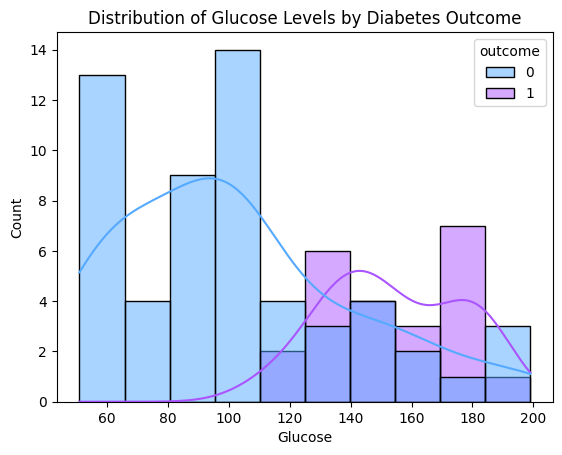

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'glucose': X_train.reset_index(drop=True).squeeze(),
    'outcome': y_train.reset_index(drop=True)
})

sns.histplot(data=data, x='glucose', hue='outcome', kde=True, bins=10, palette="cool")
plt.xlabel('Glucose')
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.show()

Train model with weighted KNN:

In [4]:
from knn import KNN

knn = KNN(k=3, weights="distance")

knn.fit(X_train, y_train)

# OR

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# knn.fit(X_train, y_train)

Predict diabetes on the test dataset:

In [5]:
y_pred = knn.predict(X_test)

Visualize the prediction performance with a confusion matrix and calculate accuracy: 

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['not-diabetic', 'diabetic'], columns=['not-positive', 'positive'])

print(cm_df)

accuracy = accuracy_score(y_test, y_pred)
print("\naccuracy:", accuracy)

              not-positive  positive
not-diabetic             9         2
diabetic                 0         9

accuracy: 0.9


Plot predicted class labels for glucose dataset:

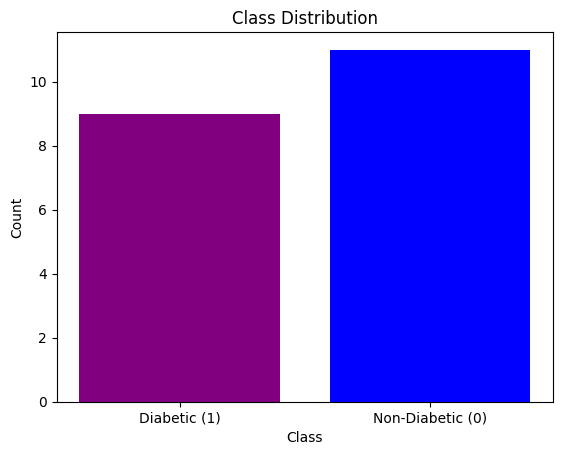

In [7]:
class_counts = pd.Series(y_pred).value_counts()

plt.bar(class_counts.index, class_counts.values, color=['blue', 'purple'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, labels=['Non-Diabetic (0)', 'Diabetic (1)'])  
plt.show()


## Things that worsened performance 

1. Oversampling to compensate for majority of negatives (using SMOTE):

In [8]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

2. Training with unweighted KNN algorithm:

In [9]:
# from knn import KNN

# knn = KNN(k=3)

# knn.fit(X_train, y_train)

# OR

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3)

# knn.fit(X_train, y_train)

## Things that weren't tested


1. Adjusting the decision threshold of KNN:

In [10]:
# from sklearn.metrics import precision_recall_curve

# y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
# thresholds = np.linspace(0, 1, 100)
# for threshold in thresholds:
#     y_pred = (y_proba >= threshold).astype(int)